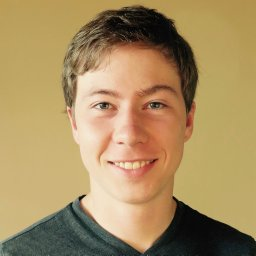
# Justin Johnson

# “Derivatives, Backpropagation, and Vectorization” — Justin Johnson (2017)

# https://cs231n.stanford.edu/handouts/derivatives.pdf
---

## Abstract

This paper provides a clear and rigorous mathematical foundation for understanding **derivatives, backpropagation, and vectorization** in deep learning. It systematically builds from scalar derivatives to gradients, Jacobians, and generalized Jacobians for tensor-valued functions, explaining how backpropagation follows directly from the **chain rule** without explicitly forming large derivative matrices. The work emphasizes computational efficiency and conceptual clarity, bridging multivariable calculus with practical neural network implementation.

---

## Problems

### Conceptual confusion around derivatives in deep learning  
Many learners struggle to generalize scalar differentiation to vector- and tensor-valued functions used in neural networks.

### Misunderstanding of backpropagation mechanics  
Backpropagation is often treated as a black-box algorithm rather than a direct consequence of the chain rule.

### Infeasibility of explicit Jacobian computation  
Explicitly forming Jacobian matrices for modern networks is computationally and memory prohibitive.

### Lack of clarity on tensor-level differentiation  
Standard matrix calculus does not adequately explain how derivatives operate on high-dimensional tensors.

---

## Proposed Solutions

### Progressive derivative framework  
Introduces derivatives in increasing generality:
- scalar derivatives  
- gradients  
- Jacobians  
- generalized (tensor) Jacobians  

### Jacobian-based chain rule formulation  
Expresses backpropagation as structured multiplications of Jacobians and generalized Jacobians.

### Vector–Jacobian product perspective  
Replaces explicit Jacobian construction with efficient computation of Jacobian–vector products.

### Concrete worked examples  
Uses low-dimensional linear layer examples that generalize naturally to large-scale neural networks.

---

## Purpose

The purpose of the paper is to provide a **mathematically precise yet intuitive** explanation of gradient computation in neural networks, demonstrating that backpropagation is a direct application of multivariable calculus and can be implemented efficiently without explicitly constructing large derivative objects.

---

## Methodology

### Mathematical exposition  
Provides formal definitions of derivatives for scalar, vector, matrix, and tensor-valued functions.

### Chain rule generalization  
Extends the chain rule from scalar functions to vector and tensor functions using Jacobian and generalized Jacobian notation.

### Tensor-aware differentiation  
Introduces structured indexing for generalized Jacobians to handle tensor inputs and outputs rigorously.

### Computational analysis  
Analyzes the memory and computational cost of explicit Jacobians and motivates vectorized alternatives.

---

## Results

### Unified derivative interpretation  
Shows that gradients, Jacobians, and tensor derivatives obey the same algebraic principles.

### Efficient backpropagation formulation  
Demonstrates that gradients with respect to inputs and parameters can be computed using vector–Jacobian products:
$$
\nabla_x \mathcal{L} = v^\top J_f(x)
$$
without explicitly forming $$J_f(x)$$.

### Scalability insight  
Explains why modern deep learning frameworks scale to large models despite implicitly enormous Jacobians.

### Practical formulas  
Derives closed-form gradient expressions for linear layers that avoid explicit Jacobian construction.

---

## Conclusions

The paper clarifies that **backpropagation is fundamentally an application of the chain rule for vector- and tensor-valued functions**, with Jacobians as the underlying mathematical structure. By emphasizing generalized Jacobians and vectorized computation, it explains how deep learning systems efficiently compute gradients at scale. This work serves as a foundational reference for understanding both the **theory** and **implementation** of gradient-based optimization in modern neural networks.


## Derivatives, Backpropagation, and Vectorization  
*Mathematical Structure with Full $$-Based Notation*

---

## 1. Scalar Derivatives

### Definition

For a scalar function
$$
f:\mathbb{R} \rightarrow \mathbb{R},
$$
the derivative at $$x$$ is
$$
f'(x) = \lim_{h \to 0} \frac{f(x+h) - f(x)}{h}.
$$

### Interpretation

The derivative measures how much the output changes in response to a small change in the input.

### Role

Establishes the intuition of derivatives as **local linear approximations**, later generalized to vectors and tensors in neural networks.

---

## 2. First-Order Approximation

### Equation

$$
f(x + \varepsilon) \approx f(x) + \varepsilon f'(x).
$$

### Meaning

Small input perturbations produce approximately linear changes in the output.

### Role

Introduces the principle that derivatives link **input perturbations to output perturbations**, a core idea in backpropagation.

---

## 3. Chain Rule (Scalar Case)

### Equation

If
$$
y = f(x), \quad z = g(y),
$$
then
$$
\frac{\partial z}{\partial x}
=
\frac{\partial z}{\partial y}
\frac{\partial y}{\partial x}.
$$

### Meaning

The influence of $$x$$ on $$z$$ propagates through intermediate variables.

### Role

Forms the conceptual backbone of backpropagation, later extended to vector- and tensor-valued functions.

---

## 4. Gradient: Vector Input, Scalar Output

### Definition

For
$$
f:\mathbb{R}^N \rightarrow \mathbb{R},
$$
the gradient is
$$
\nabla_x f(x)
=
\left(
\frac{\partial f}{\partial x_1},
\ldots,
\frac{\partial f}{\partial x_N}
\right).
$$

### Linear Approximation

$$
f(x + \Delta x)
\approx
f(x) + \nabla_x f(x) \cdot \Delta x.
$$

### Interpretation

Each component of the gradient measures sensitivity along one coordinate direction.

### Role

Explains how loss functions depend on vector inputs, enabling gradient-based learning.

---

## 5. Jacobian Matrix: Vector Input, Vector Output

### Definition

For
$$
f:\mathbb{R}^N \rightarrow \mathbb{R}^M,
$$
with
$$
y = f(x),
$$
the Jacobian is
$$
J_f(x)
=
\begin{bmatrix}
\frac{\partial y_1}{\partial x_1} & \cdots & \frac{\partial y_1}{\partial x_N} \\
\vdots & \ddots & \vdots \\
\frac{\partial y_M}{\partial x_1} & \cdots & \frac{\partial y_M}{\partial x_N}
\end{bmatrix}.
$$

### Linear Approximation

$$
y(x + \Delta x)
\approx
y(x) + J_f(x)\,\Delta x.
$$

### Meaning

The Jacobian encodes how **every output component depends on every input component**.

### Role

Provides the correct derivative object for neural network layers, which map vectors to vectors.

---

## 6. Chain Rule with Jacobians

### Equation

If
$$
y = f(x), \quad z = g(y),
$$
then
$$
\frac{\partial z}{\partial x}
=
\frac{\partial z}{\partial y}
\frac{\partial y}{\partial x}.
$$

In matrix form:
$$
J_{g \circ f}(x)
=
J_g(y)\,J_f(x).
$$

### Interpretation

Backpropagation is mathematically a **sequence of Jacobian multiplications**.

### Role

Shows that gradient propagation in deep networks is a direct application of multivariable calculus.

---

## 7. Generalized Jacobian: Tensor Input, Tensor Output

### Definition

For tensor-valued functions
$$
f:
\mathbb{R}^{N_1 \times \cdots \times N_{D_x}}
\rightarrow
\mathbb{R}^{M_1 \times \cdots \times M_{D_y}},
$$
the derivative
$$
\frac{\partial y}{\partial x}
$$
is a generalized Jacobian with shape
$$
(M_1 \times \cdots \times M_{D_y})
\times
(N_1 \times \cdots \times N_{D_x}).
$$

### Elementwise Form

$$
\left(\frac{\partial y}{\partial x}\right)_{i,j}
=
\frac{\partial y_i}{\partial x_j}.
$$

### Role

Extends differentiation to images, feature maps, and batches represented as tensors.

---

## 8. Generalized Matrix–Vector and Matrix–Matrix Products

### Equation

$$
\left(
\frac{\partial y}{\partial x}\,\Delta x
\right)_j
=
\sum_i
\left(\frac{\partial y}{\partial x}\right)_{i,j}
(\Delta x)_i.
$$

### Interpretation

Tensor differentiation follows the same algebraic rules as matrix calculus, with higher-dimensional indexing.

### Role

Justifies using familiar linear algebra operations for tensor backpropagation.

---

## 9. Backpropagation with Tensors

### Core Equations

For a layer
$$
y = f(x, w)
$$
and scalar loss $$L$$:
$$
\frac{\partial L}{\partial x}
=
\frac{\partial L}{\partial y}
\frac{\partial y}{\partial x},
\qquad
\frac{\partial L}{\partial w}
=
\frac{\partial L}{\partial y}
\frac{\partial y}{\partial w}.
$$

### Role

Formally defines backpropagation as **Jacobian–vector products**, not explicit Jacobian construction.

---

## 10. Computational Infeasibility of Explicit Jacobians

### Example

For a linear layer with
$$
N = 64, \quad D = M = 4096,
$$
the Jacobian size is approximately
$$
64 \cdot 4096 \cdot 64 \cdot 4096
>
6.8 \times 10^{10}
$$
entries.

### Role

Demonstrates why explicit Jacobians are impractical in real neural networks.

---

## 11. Vector–Jacobian Products

### Key Insight

Instead of forming
$$
\frac{\partial y}{\partial x},
$$
compute
$$
\frac{\partial L}{\partial y}
\frac{\partial y}{\partial x}.
$$

### Role

Explains how automatic differentiation frameworks efficiently implement backpropagation.

---

## 12. Worked Example: Linear Layer

### Model

$$
y = xw.
$$

### Resulting Gradient

$$
\frac{\partial L}{\partial x}
=
\frac{\partial L}{\partial y}\,w^\top.
$$

### Meaning

Gradients are computed via simple matrix multiplications.

### Role

Shows how vectorization replaces explicit differentiation, enabling scalable learning.

---

## 13. Statistical Content

This paper contains **no statistical inference**:
- No hypothesis testing  
- No estimators or confidence intervals  
- No probabilistic modeling  

The analysis is entirely deterministic, based on calculus and linear algebra.

---

## Final Mathematical Insight

- All derivatives in deep learning reduce to **linear approximations**
- Backpropagation equals **Jacobians + chain rule**
- Scalability comes from **vector–Jacobian products**, not storing Jacobians
- Tensor differentiation obeys the same rules as matrix calculus

---

## One-Sentence Summary

Backpropagation is simply efficient multivariable calculus applied to vector- and tensor-valued functions, with Jacobians providing the mathematical structure and vectorization making large-scale learning computationally feasible.


## How the Jacobian Matrix, Its Determinant, and Norm-Based Constants Explain  
## Derivatives, Backpropagation, and Vectorization

---

## 1. Jacobian Matrix: The Core Object Linking All Three Perspectives

### 1.1 Role in Derivatives

In deep learning, most mappings are vector-valued:
$$
f:\mathbb{R}^n \rightarrow \mathbb{R}^m.
$$

For such functions, the Jacobian matrix
$$
J_f(x) = \frac{\partial y}{\partial x}
$$
is the correct generalization of the derivative.

#### How It Helps

The Jacobian provides a **first-order linear approximation**:
$$
f(x + \Delta x)
\approx
f(x) + J_f(x)\,\Delta x.
$$

This reframes derivatives as **local linear maps** acting on perturbation vectors, rather than symbolic expressions. Every neural network layer locally behaves like a linear transformation defined by its Jacobian.

---

### 1.2 Role in Backpropagation

A neural network is a composition of functions:
$$
f = f_L \circ f_{L-1} \circ \cdots \circ f_1.
$$

Applying the chain rule yields:
$$
\frac{\partial \mathcal{L}}{\partial x}
=
\frac{\partial \mathcal{L}}{\partial y_L}
J_{f_L}
J_{f_{L-1}}
\cdots
J_{f_1}.
$$

#### How It Helps

- Backpropagation is mathematically a **product of Jacobian matrices**
- Gradient flow is fully explained by matrix multiplication
- Vanishing and exploding gradients arise from repeated Jacobian products

This provides a rigorous explanation for gradient behavior in deep networks.

---

### 1.3 Role in Vectorization

Explicit Jacobian matrices are prohibitively large. The key idea is:

Instead of forming $$J$$, compute
$$
v^\top J
$$
which is a **vector–Jacobian product**.

#### How It Helps

- Enables efficient gradient computation
- Justifies vectorized implementations in deep learning frameworks
- Explains how backpropagation scales to very large models

---

## 2. Determinant of the Jacobian: Measuring Local Volume Change

### 2.1 Geometric Meaning

For square Jacobians ($$n = m$$), the determinant
$$
\det(J_f(x))
$$
measures how the function locally transforms volume.

- $$|\det(J)| > 1$$ : local expansion  
- $$|\det(J)| < 1$$ : local contraction  
- $$\det(J) = 0$$ : collapse of dimensions  

---

### 2.2 Role in Backpropagation Intuition

Although determinants are not computed explicitly during backpropagation, they provide crucial **geometric intuition**.

#### How It Helps

- Repeated contractions explain vanishing gradients
- Strong expansions explain instability
- Links optimization difficulty to geometric distortion of space

This perspective is especially useful for understanding:
- Deep linear networks  
- Normalization effects  
- Invertibility and information loss  

---

### 2.3 Role in Vectorization

The determinant also explains why explicit Jacobians are unnecessary:

- Full volume-change information is rarely required
- Optimization depends on **directional sensitivity**, not total distortion
- Vector–Jacobian products capture exactly what learning needs

---

## 3. Constants (Norms, Lipschitz-Type Bounds): Controlling Scale and Stability

While not always stated explicitly, norm-based constants play a central role.

---

### 3.1 Jacobian Norm as a Stability Constant

The operator norm
$$
\|J_f(x)\|
$$
bounds output sensitivity:
$$
\|f(x_1) - f(x_2)\|
\le
\|J_f(x)\| \, \|x_1 - x_2\|.
$$

#### How It Helps

- Quantifies sensitivity to perturbations
- Explains exploding gradients when norms are large
- Explains vanishing gradients when norms are small
- Connects calculus directly to optimization stability

---

### 3.2 Role in Backpropagation

For a deep network:
$$
\|J_{\text{network}}\|
\le
\prod_{l=1}^{L} \|J_l\|.
$$

#### How It Helps

- Explains why depth amplifies instability
- Motivates:
  - residual connections  
  - normalization layers  
  - careful initialization  

---

### 3.3 Role in Vectorization

Norm-based bounds justify vectorized computation:

- Gradients depend on **scaled directional derivatives**
- Vectorization exploits linearity and boundedness
- No need to track full higher-order geometric structure

---

## 4. Unified View Across the Three Perspectives

| Concept | What It Explains | Why It Matters |
|---|---|---|
| Jacobian matrix | Local linear behavior | Foundation of backpropagation |
| Jacobian determinant | Local volume distortion | Geometric intuition for stability |
| Jacobian norm / constants | Sensitivity bounds | Explains gradient explosion and vanishing |
| Vector–Jacobian products | Efficient computation | Enables scalable training |

---

## 5. Big Picture Insight

- Derivatives explain how outputs change  
- Jacobians explain how **vectors** change  
- Determinants explain how **space** deforms  
- Norm-based constants explain **stability**  
- Vectorization explains **efficient computation**  

---

## One-Sentence Summary

In derivatives, backpropagation, and vectorization, the Jacobian matrix provides the mathematical structure, the determinant provides geometric intuition, and norm-based constants provide stability control—together explaining how deep learning gradients are computed, propagated, and made computationally feasible.
